In [1]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump
import pyemma
from msmbuilder.featurizer import DihedralFeaturizer

/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/arghya/opt/anaconda3/envs/msmbuilder/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/a

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=200)
plt.rcParams["figure.figsize"] = (15,5)

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [2]:
distance = load("distance.pkl")
dxx=np.concatenate(distance)

In [3]:
distancearg=load("distance-arg.pkl")
dxxarg=np.concatenate(distancearg)

In [4]:
feat_data = load("featuresaddfeatchinosincos.pkl")
fxx=np.concatenate(feat_data)

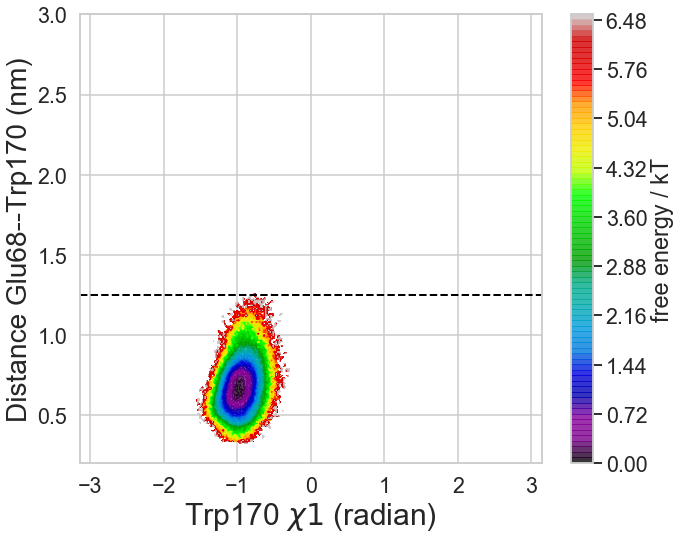

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,5], dxx[:,0], ax=ax, legacy=False, alpha=0.8)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=30)
ax.set_ylabel('Distance Glu68--Trp170 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
ax.set_ylim(0.2, 3.0)
#ax.set_aspect('equal')
#ax.set_title('XIAP+RIPK2')
fig.tight_layout()

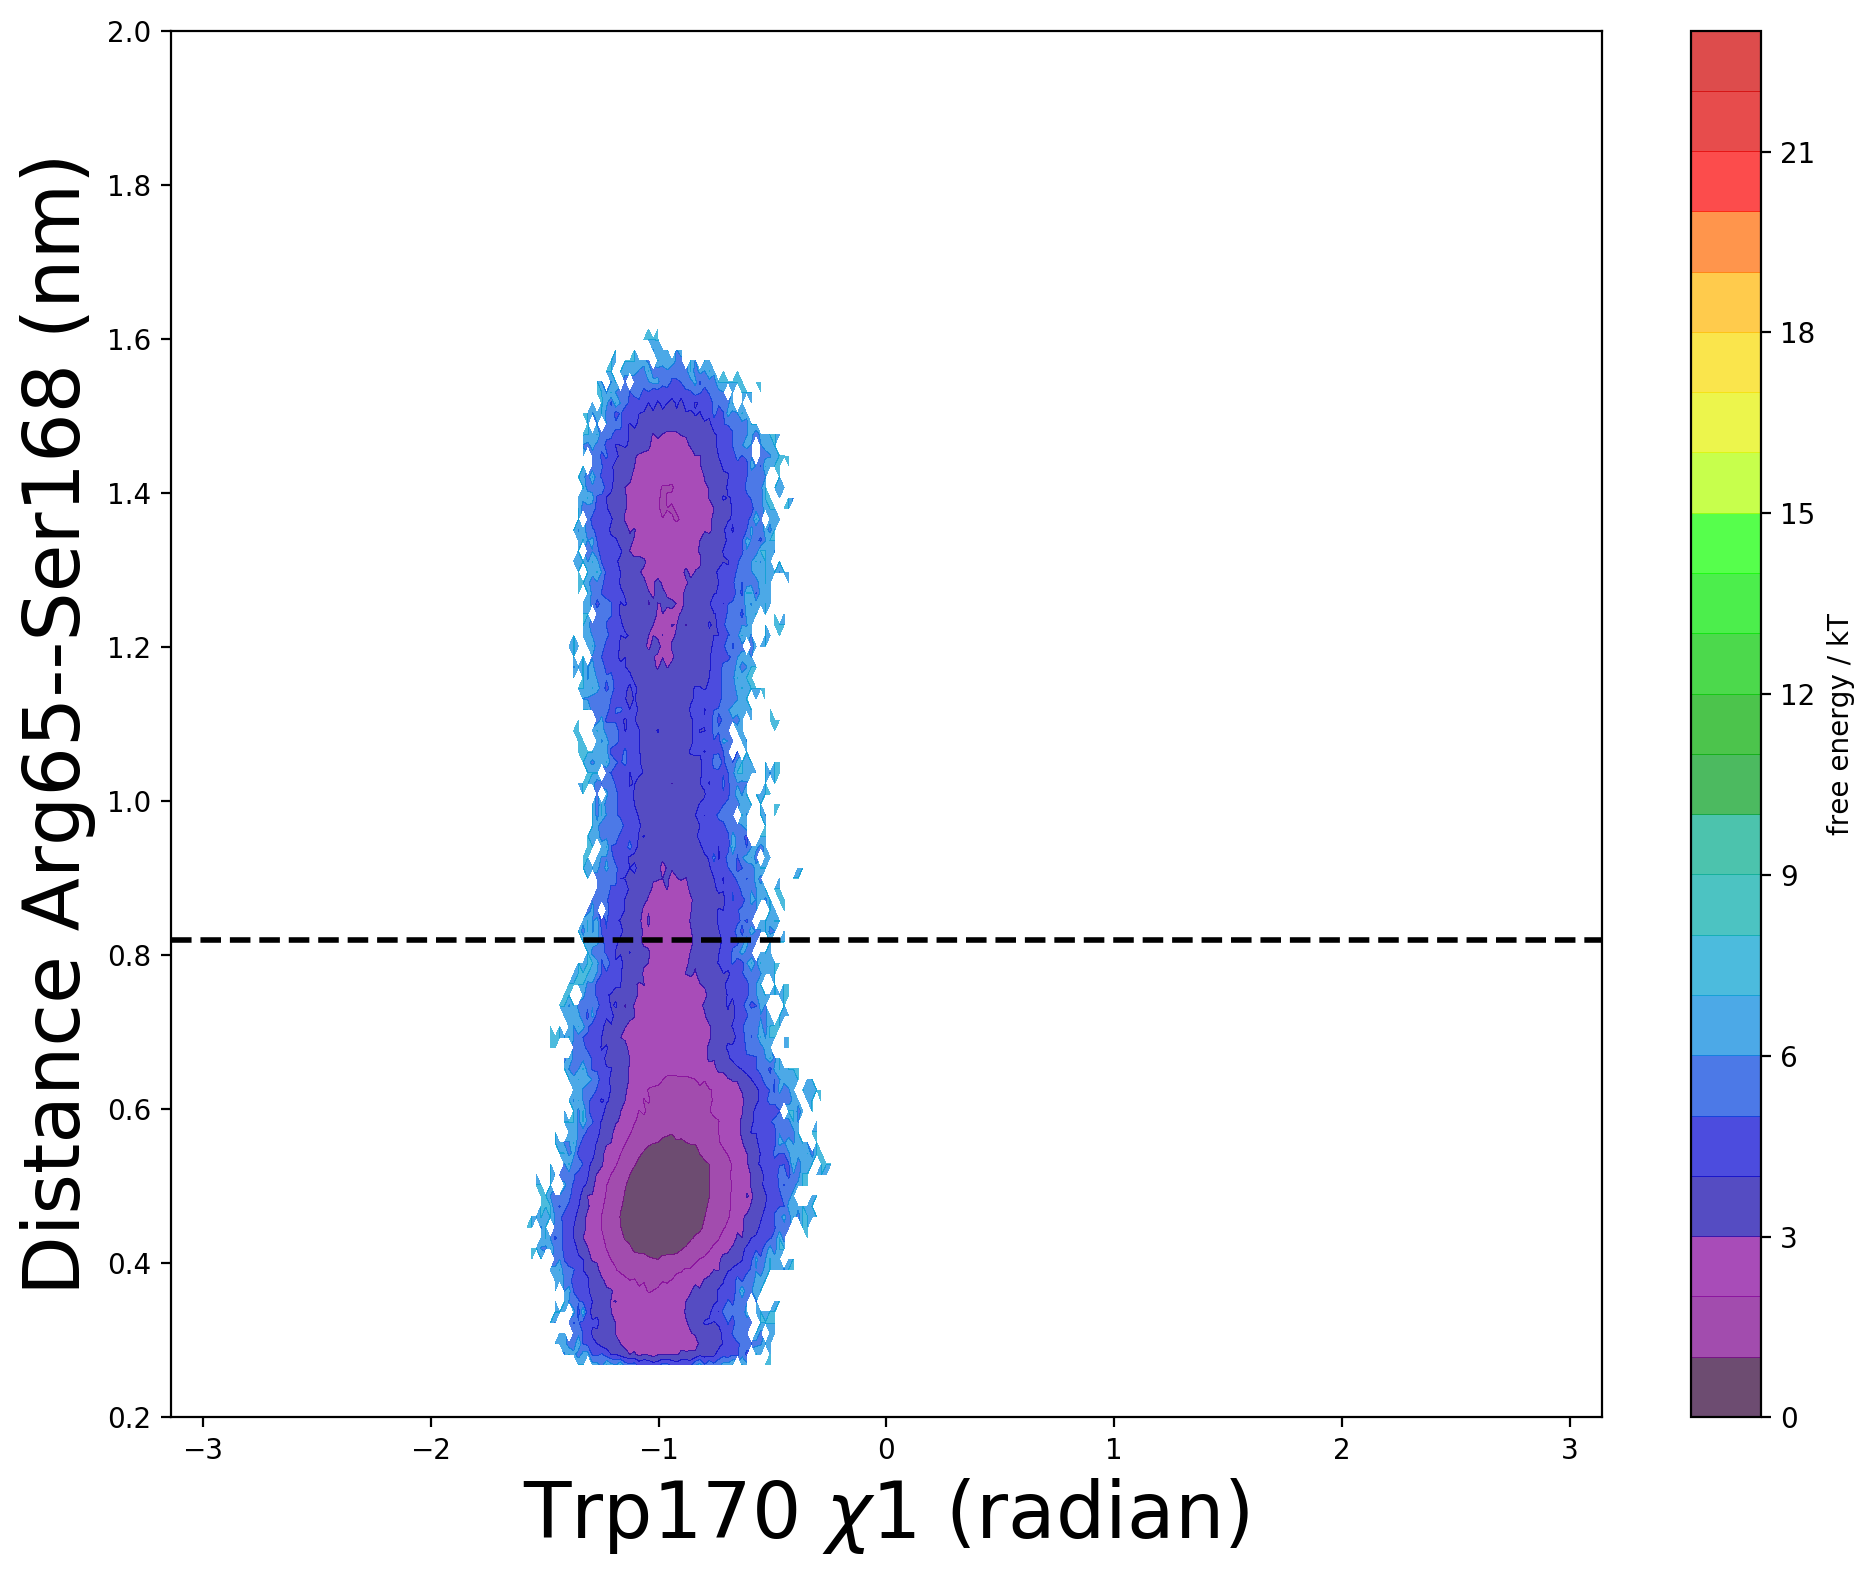

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,5], dxxarg[:,0], ax=ax, levels=np.arange(0, 24, 1), vmin=0, vmax=24, alpha=0.7)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.2, 2.0)
#ax.set_title('Starting Normal')
ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
#ax.scatter(trpchi1, trparg, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

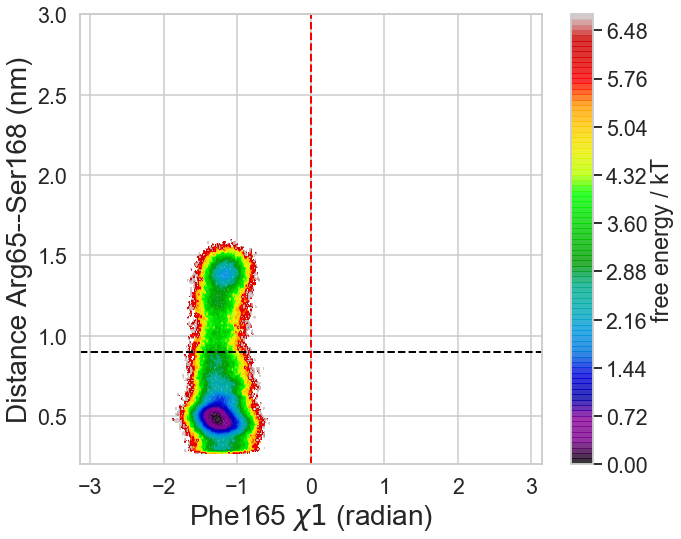

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,1], dxxarg[:,0], ax=ax, legacy=False, alpha=0.8)
ax.set_xlabel('Phe165 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(0.2, 3.0)
ax.axhline(y=0.9, color='black', linestyle='--', linewidth=2)
ax.axvline(x=0.0, color='red', linestyle='--', linewidth=2)
fig.tight_layout()

In [6]:
time=np.arange(0, 300000, 1)

In [7]:
time.shape

(300000,)

In [11]:
dxxarg[:,0].shape

(300000,)

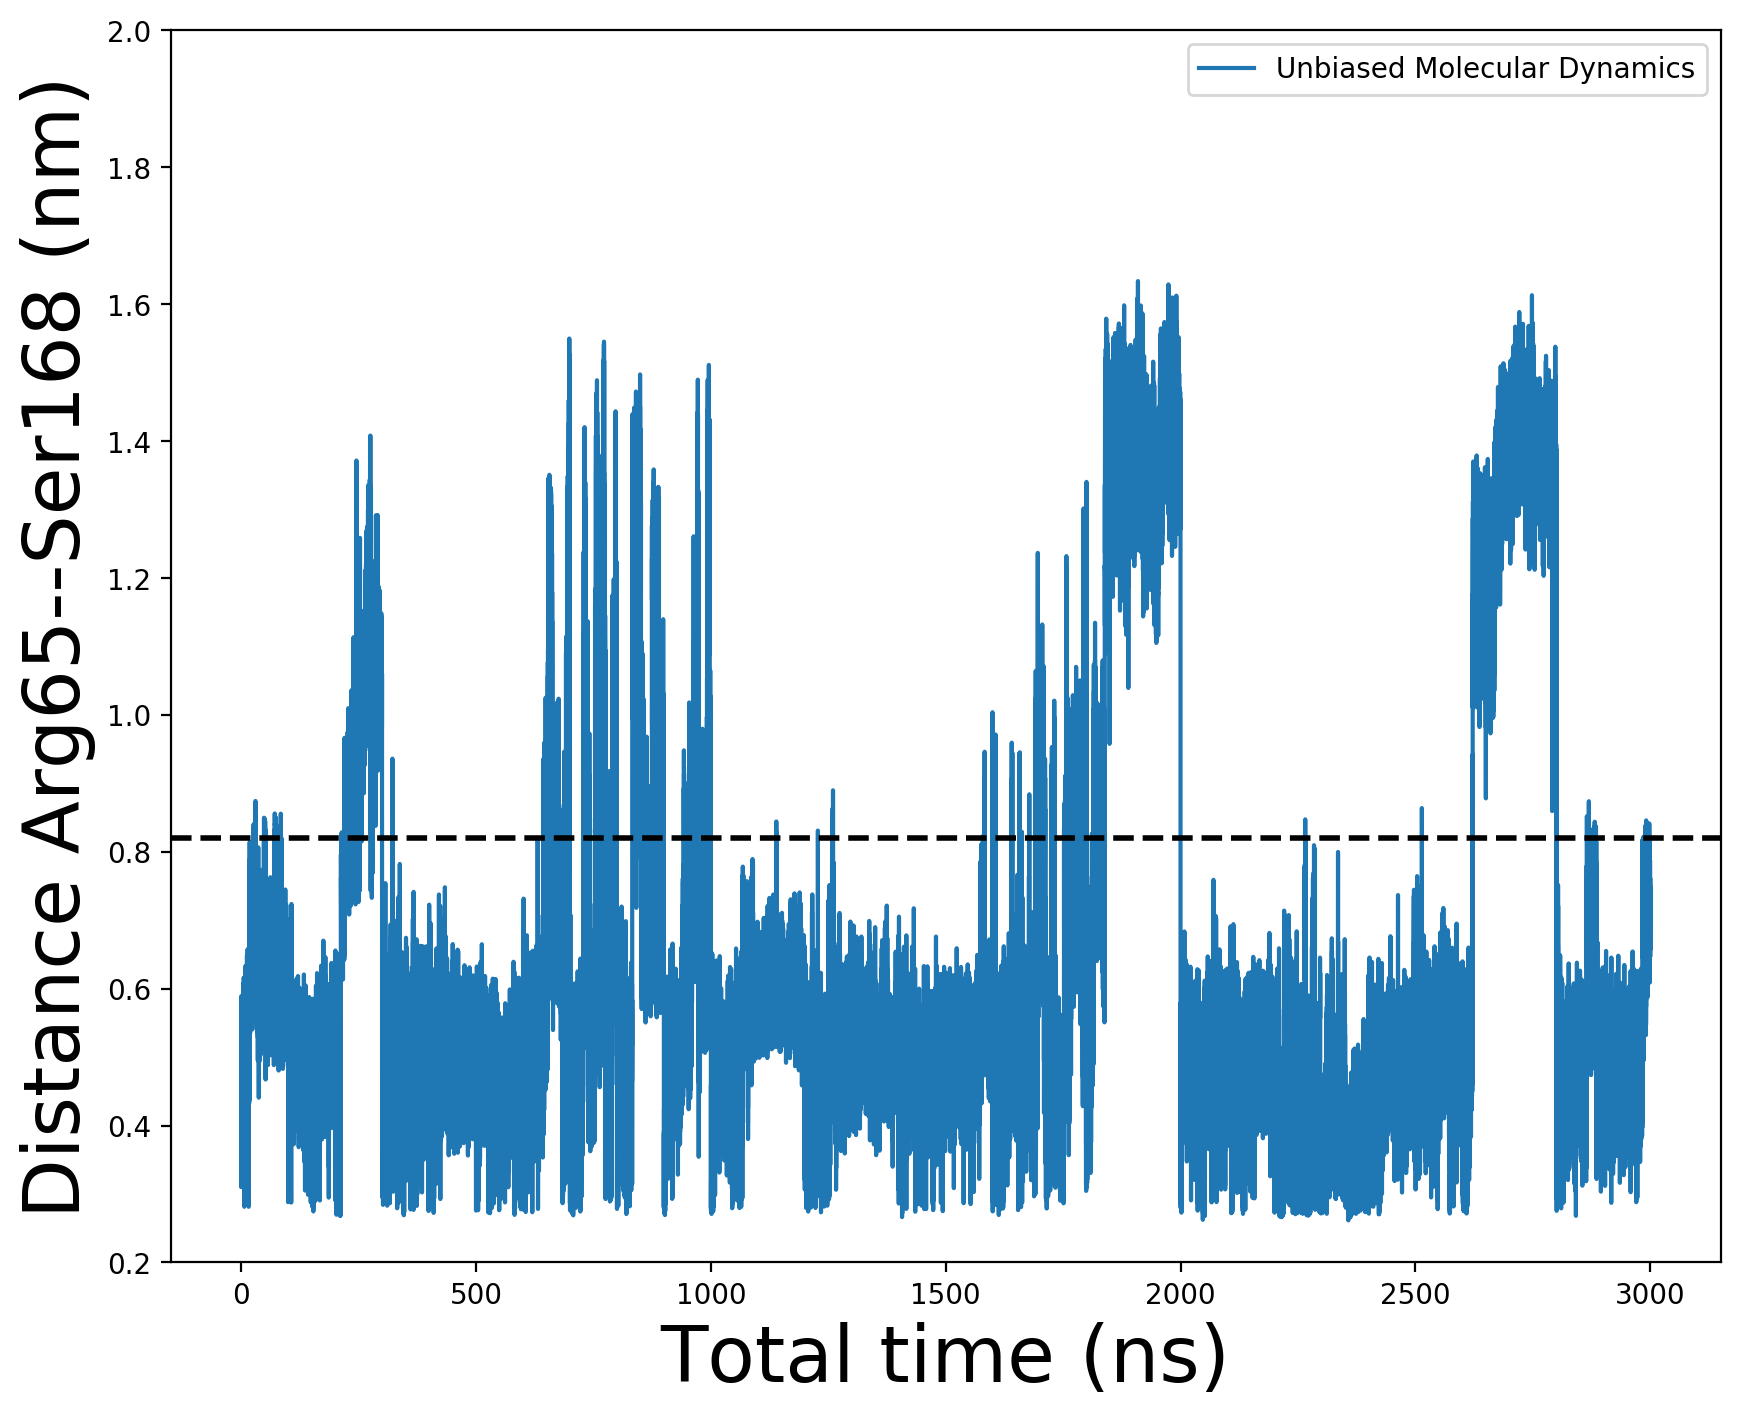

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxarg[:,0], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance Arg65--Ser168 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.0)
ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

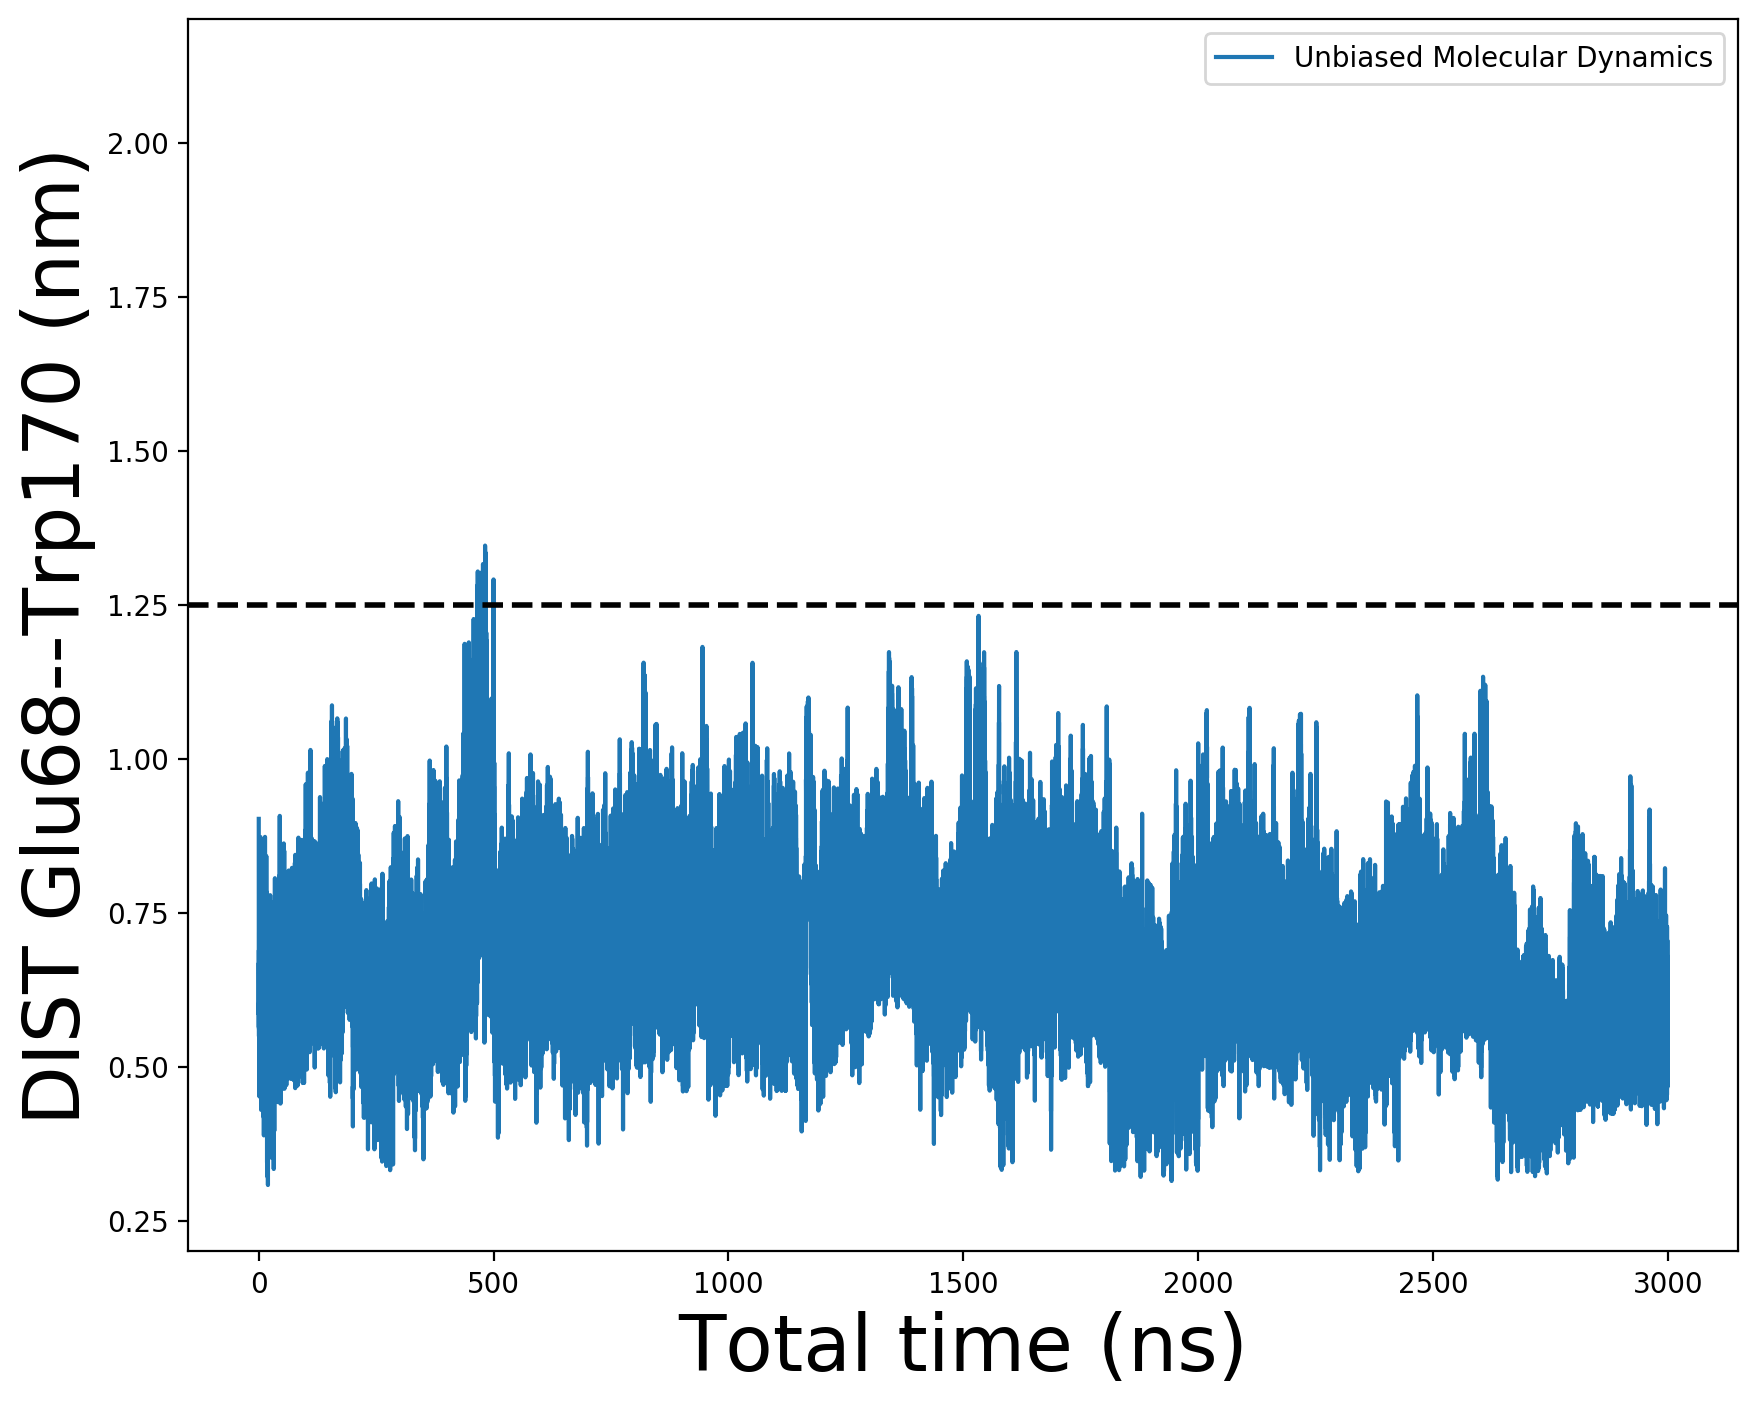

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxx[:,0], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('DIST Glu68--Trp170 (nm)', fontsize=28)
ax.set_ylim(0.2, 2.2)
ax.axhline(y=1.25, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

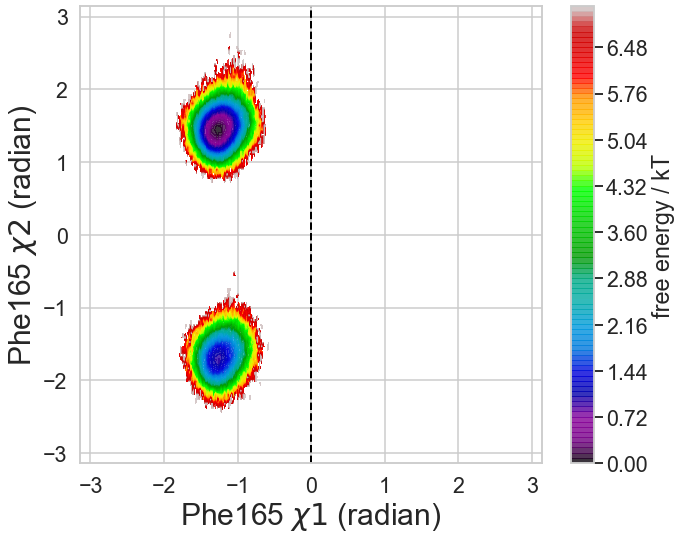

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,1], fxx[:,44], ax=ax, legacy=False, alpha=0.8)
ax.set_xlabel('Phe165 $\chi1$ (radian)', fontsize=30)
ax.set_ylabel('Phe165 $\chi2$ (radian)', fontsize=30)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_aspect('equal')
ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
fig.tight_layout()

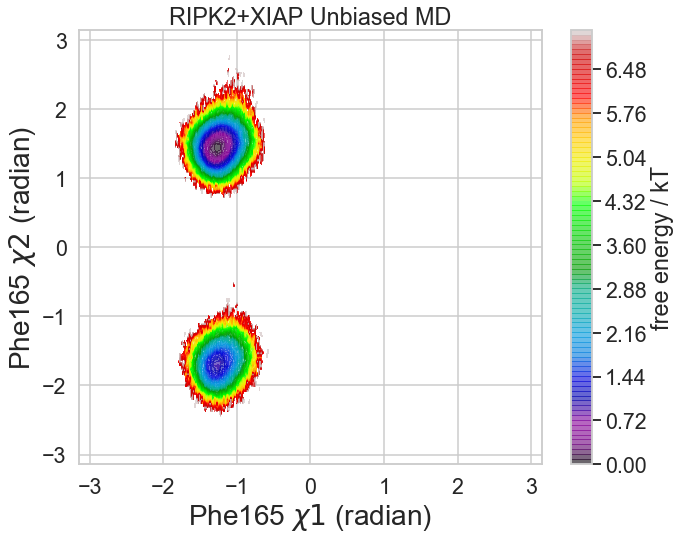

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,1], fxx[:,44], ax=ax, alpha=0.6)
ax.set_xlabel('Phe165 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Phe165 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_title('RIPK2+XIAP Unbiased MD')
#ax.scatter(phechi1, phechi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

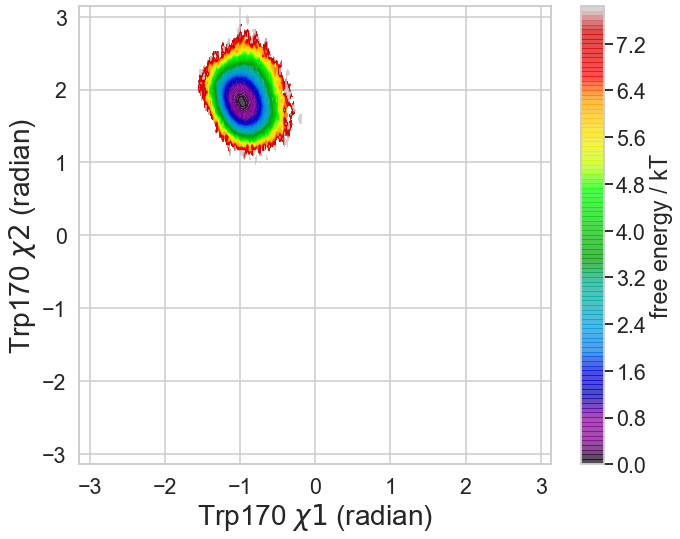

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
pyemma.plots.plot_free_energy(fxx[:,5], fxx[:,47], ax=ax,  alpha=0.7)
ax.set_xlabel('Trp170 $\chi1$ (radian)', fontsize=28)
ax.set_ylabel('Trp170 $\chi2$ (radian)', fontsize=28)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
#ax.set_title('RIPK2+XIAP Unbiased MD')
#ax.scatter(trpchi1, trpchi2, color='black', s=30, marker="o", label='Holo Xtals')
fig.tight_layout()
plt.show()

## XIAP interaction interface

In [4]:
distancex = load("distance-xiap.pkl")
dxxx=np.concatenate(distancex)

In [5]:
dxxx.shape

(300000, 8)

In [16]:
dxxx[:,0]

array([0.2890017 , 0.3306374 , 0.29525572, ..., 0.46746263, 0.49335667,
       0.42512375], dtype=float32)

## Time trace XIAP-RIPK2 interface

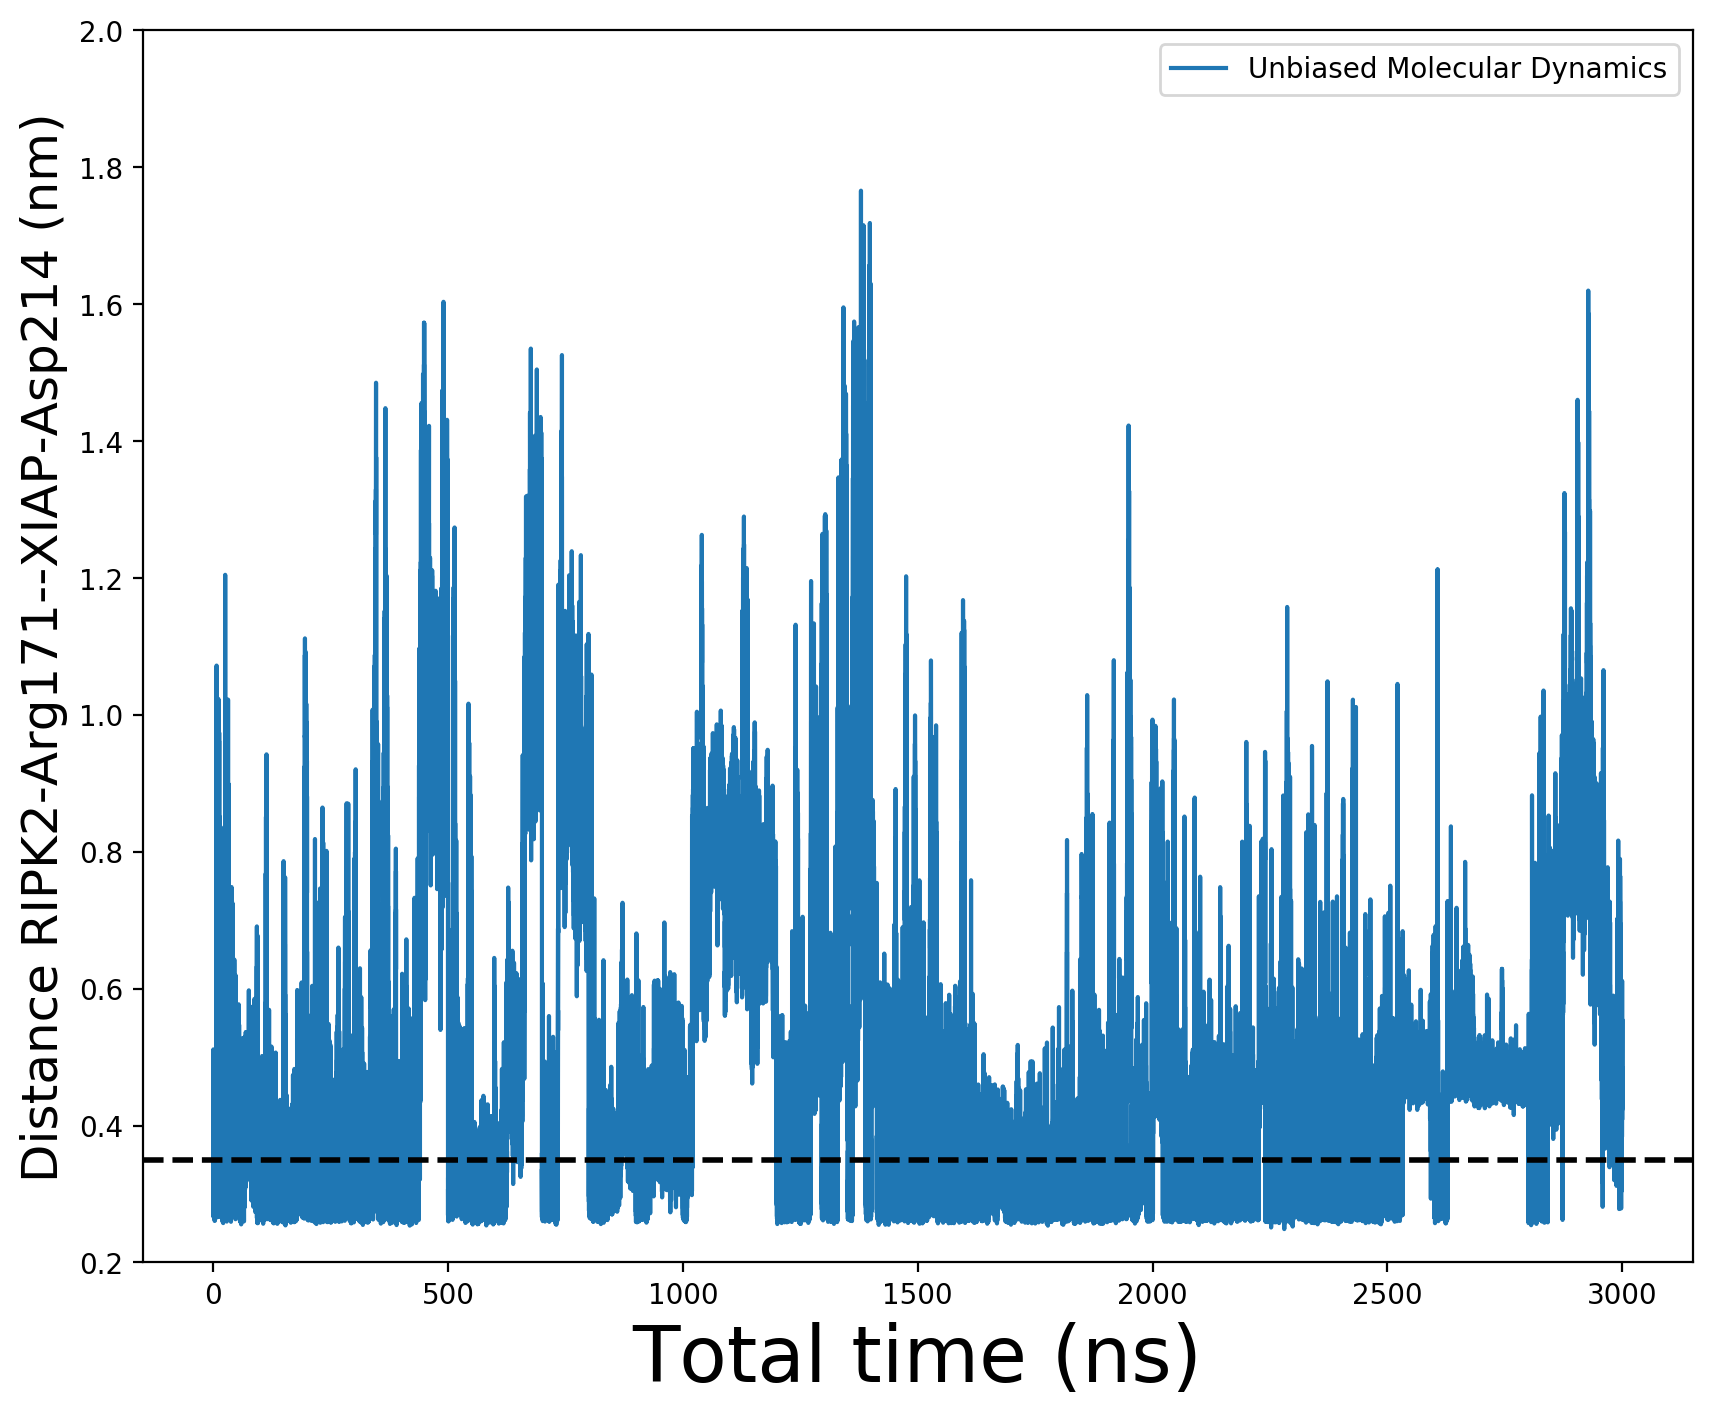

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,0], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Arg171--XIAP-Asp214 (nm)', fontsize=18)
ax.set_ylim(0.2, 2.0)
ax.axhline(y=0.35, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

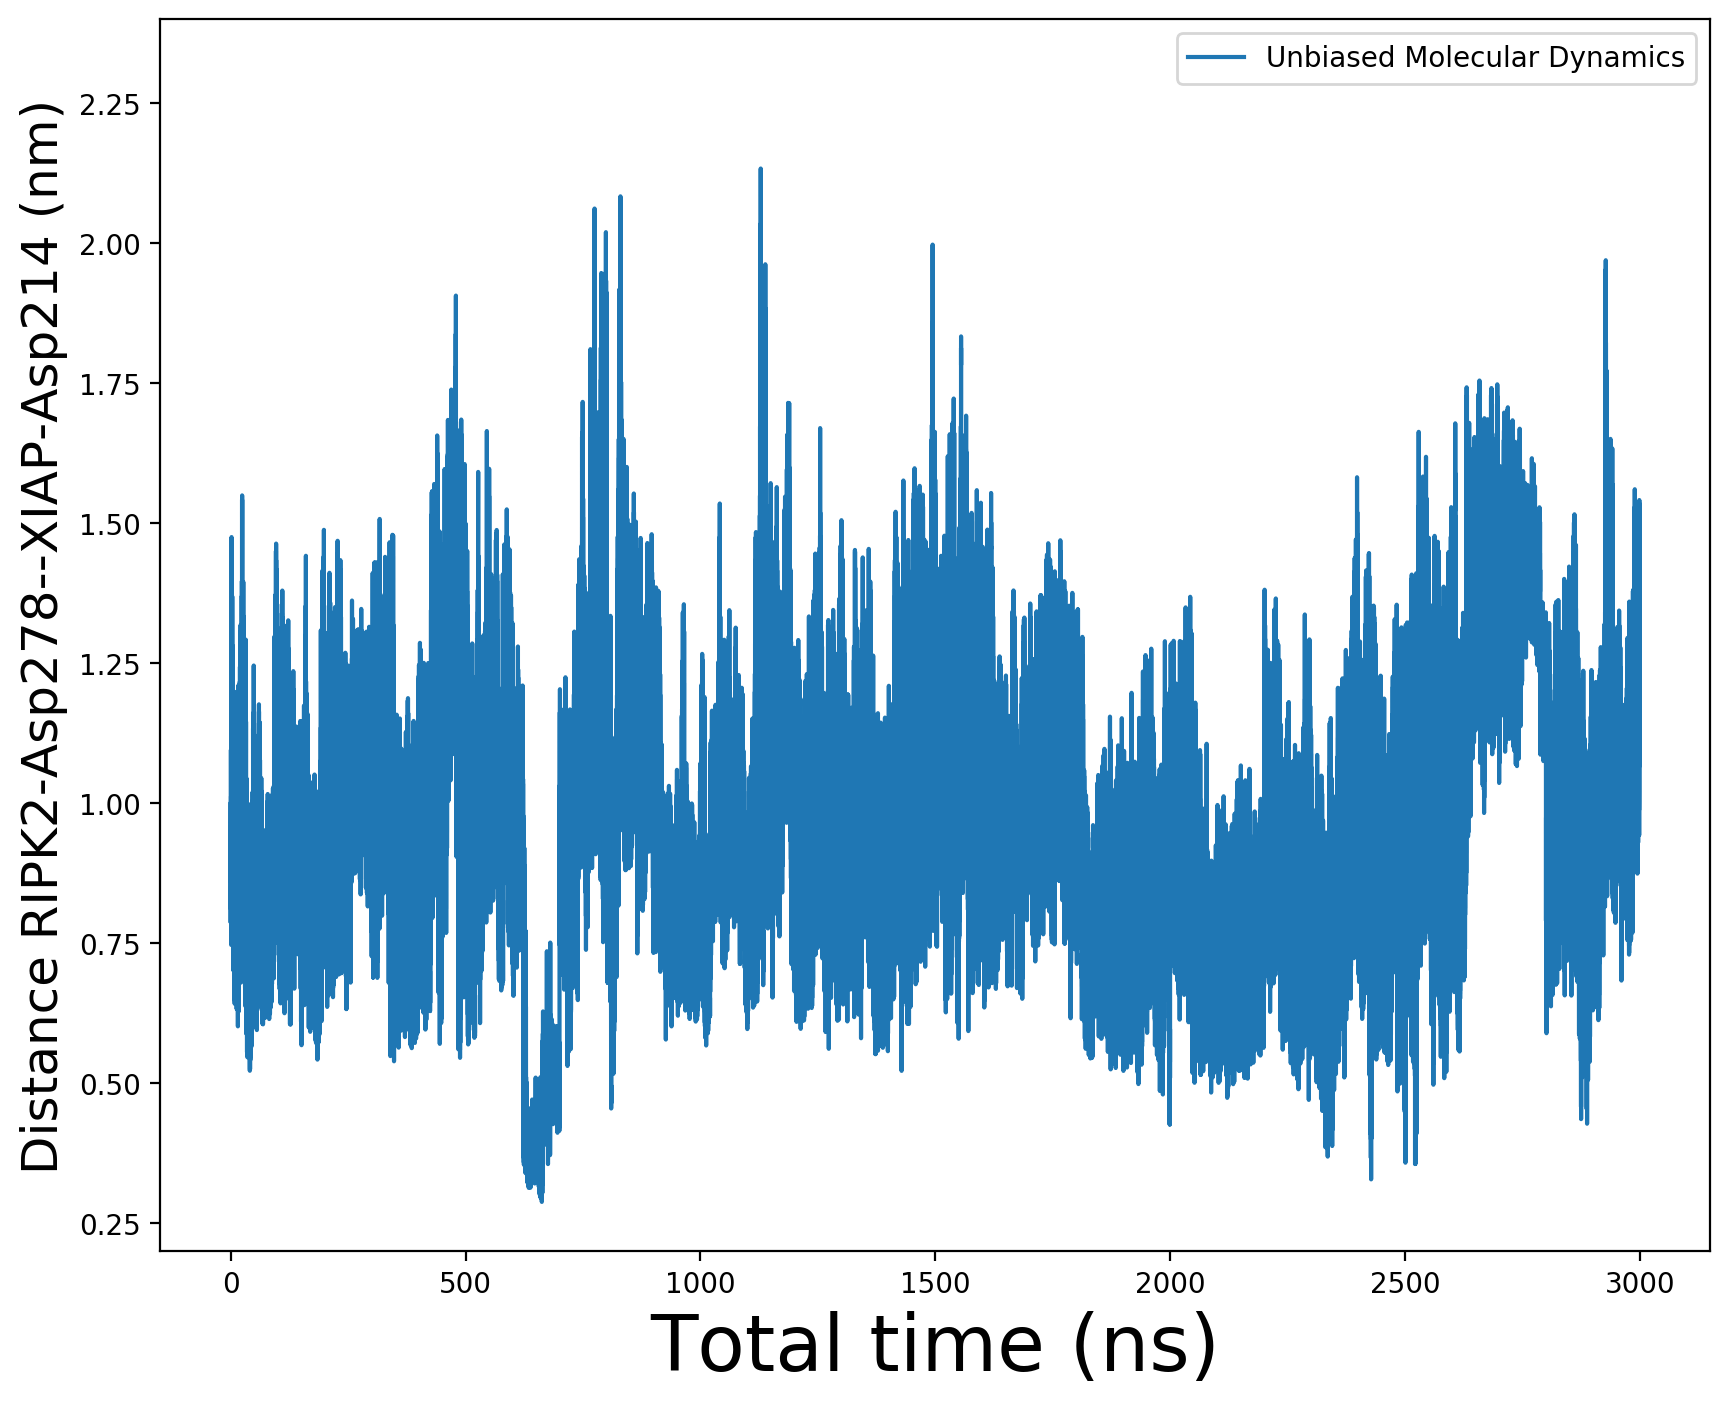

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,6], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Asp278--XIAP-Asp214 (nm)', fontsize=18)
ax.set_ylim(0.2, 2.4)
#ax.axhline(y=0.82, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

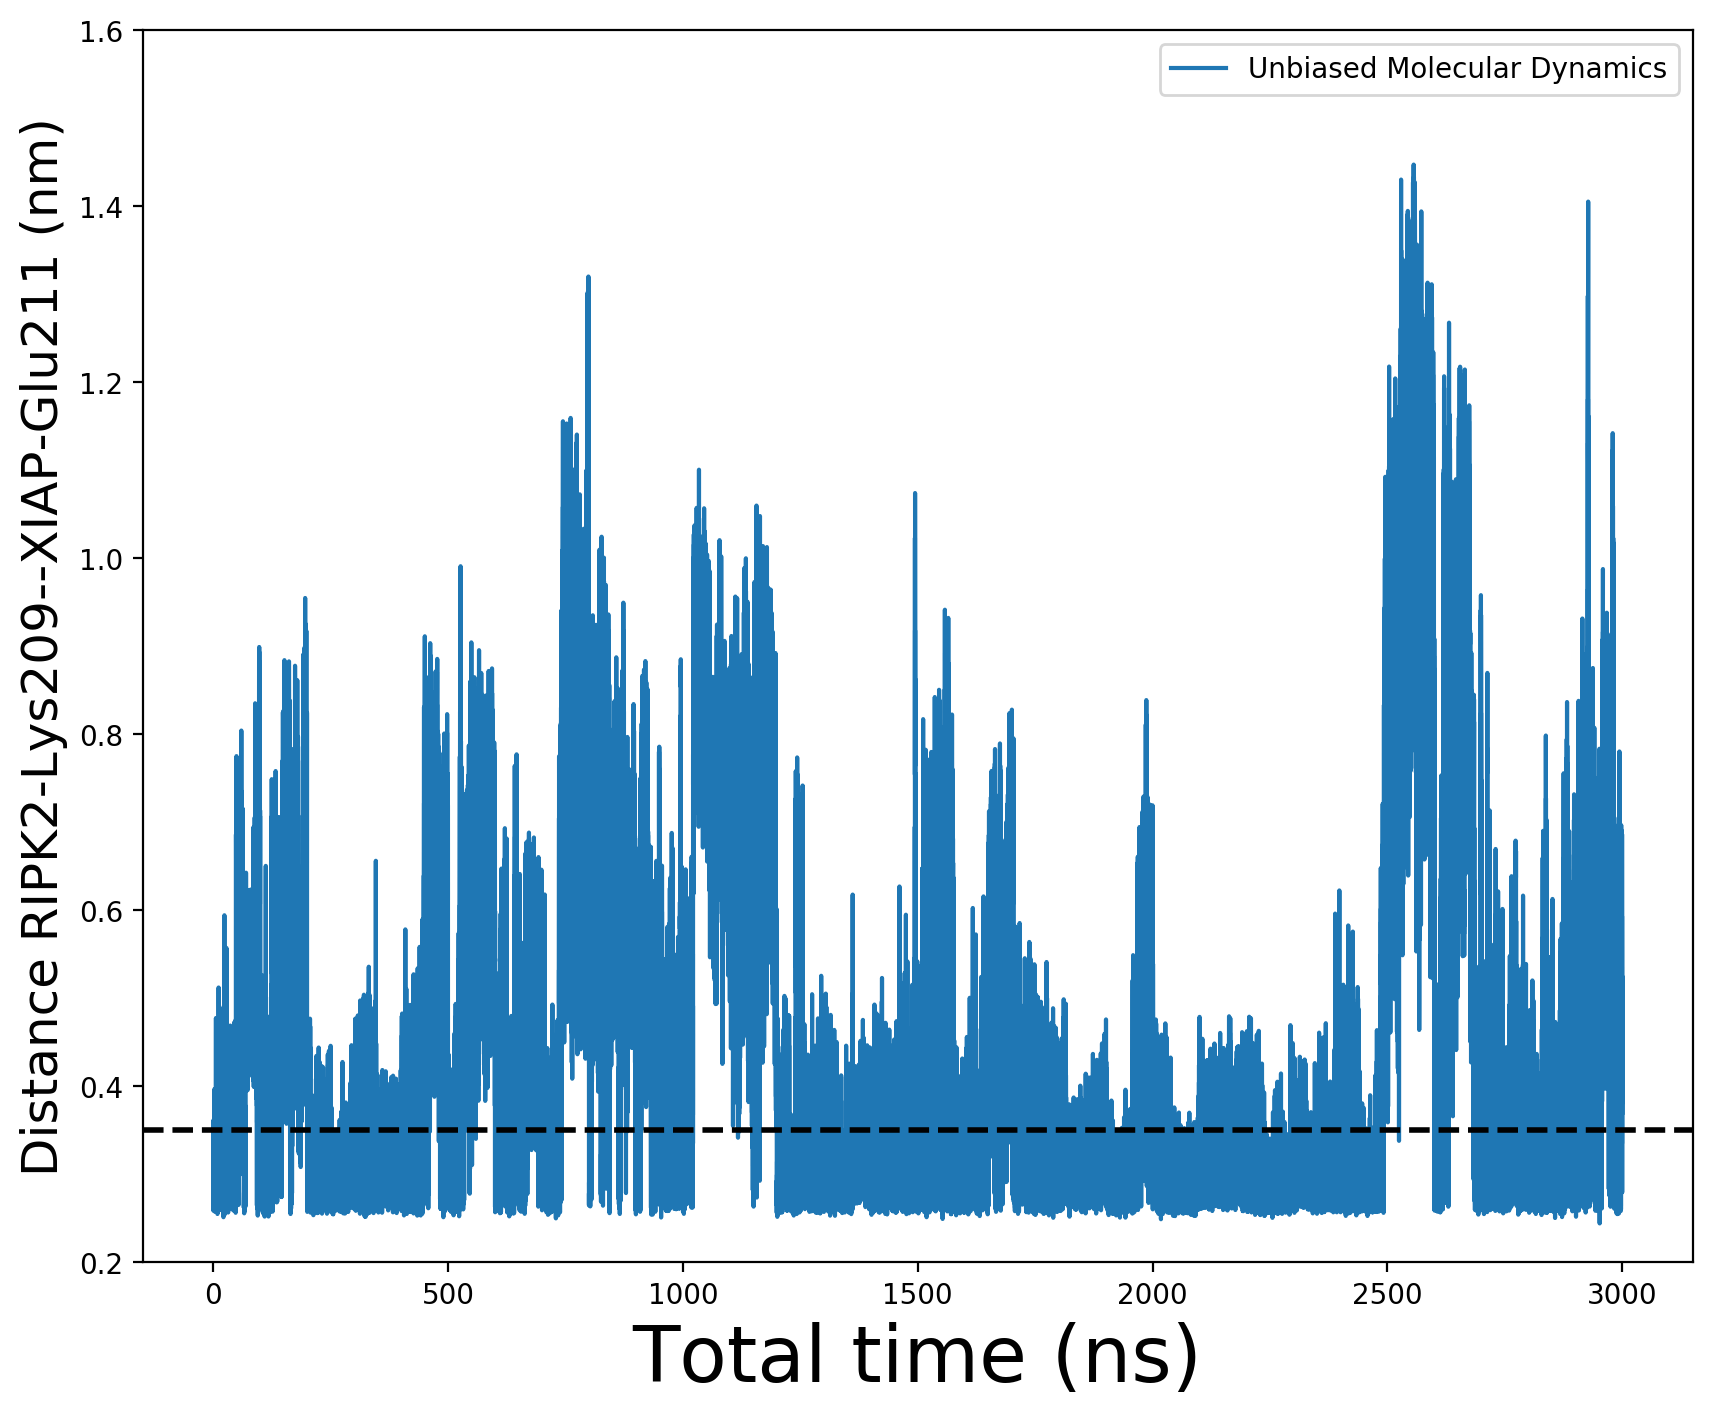

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,2], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Lys209--XIAP-Glu211 (nm)', fontsize=18)
ax.set_ylim(0.2, 1.6)
ax.axhline(y=0.35, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

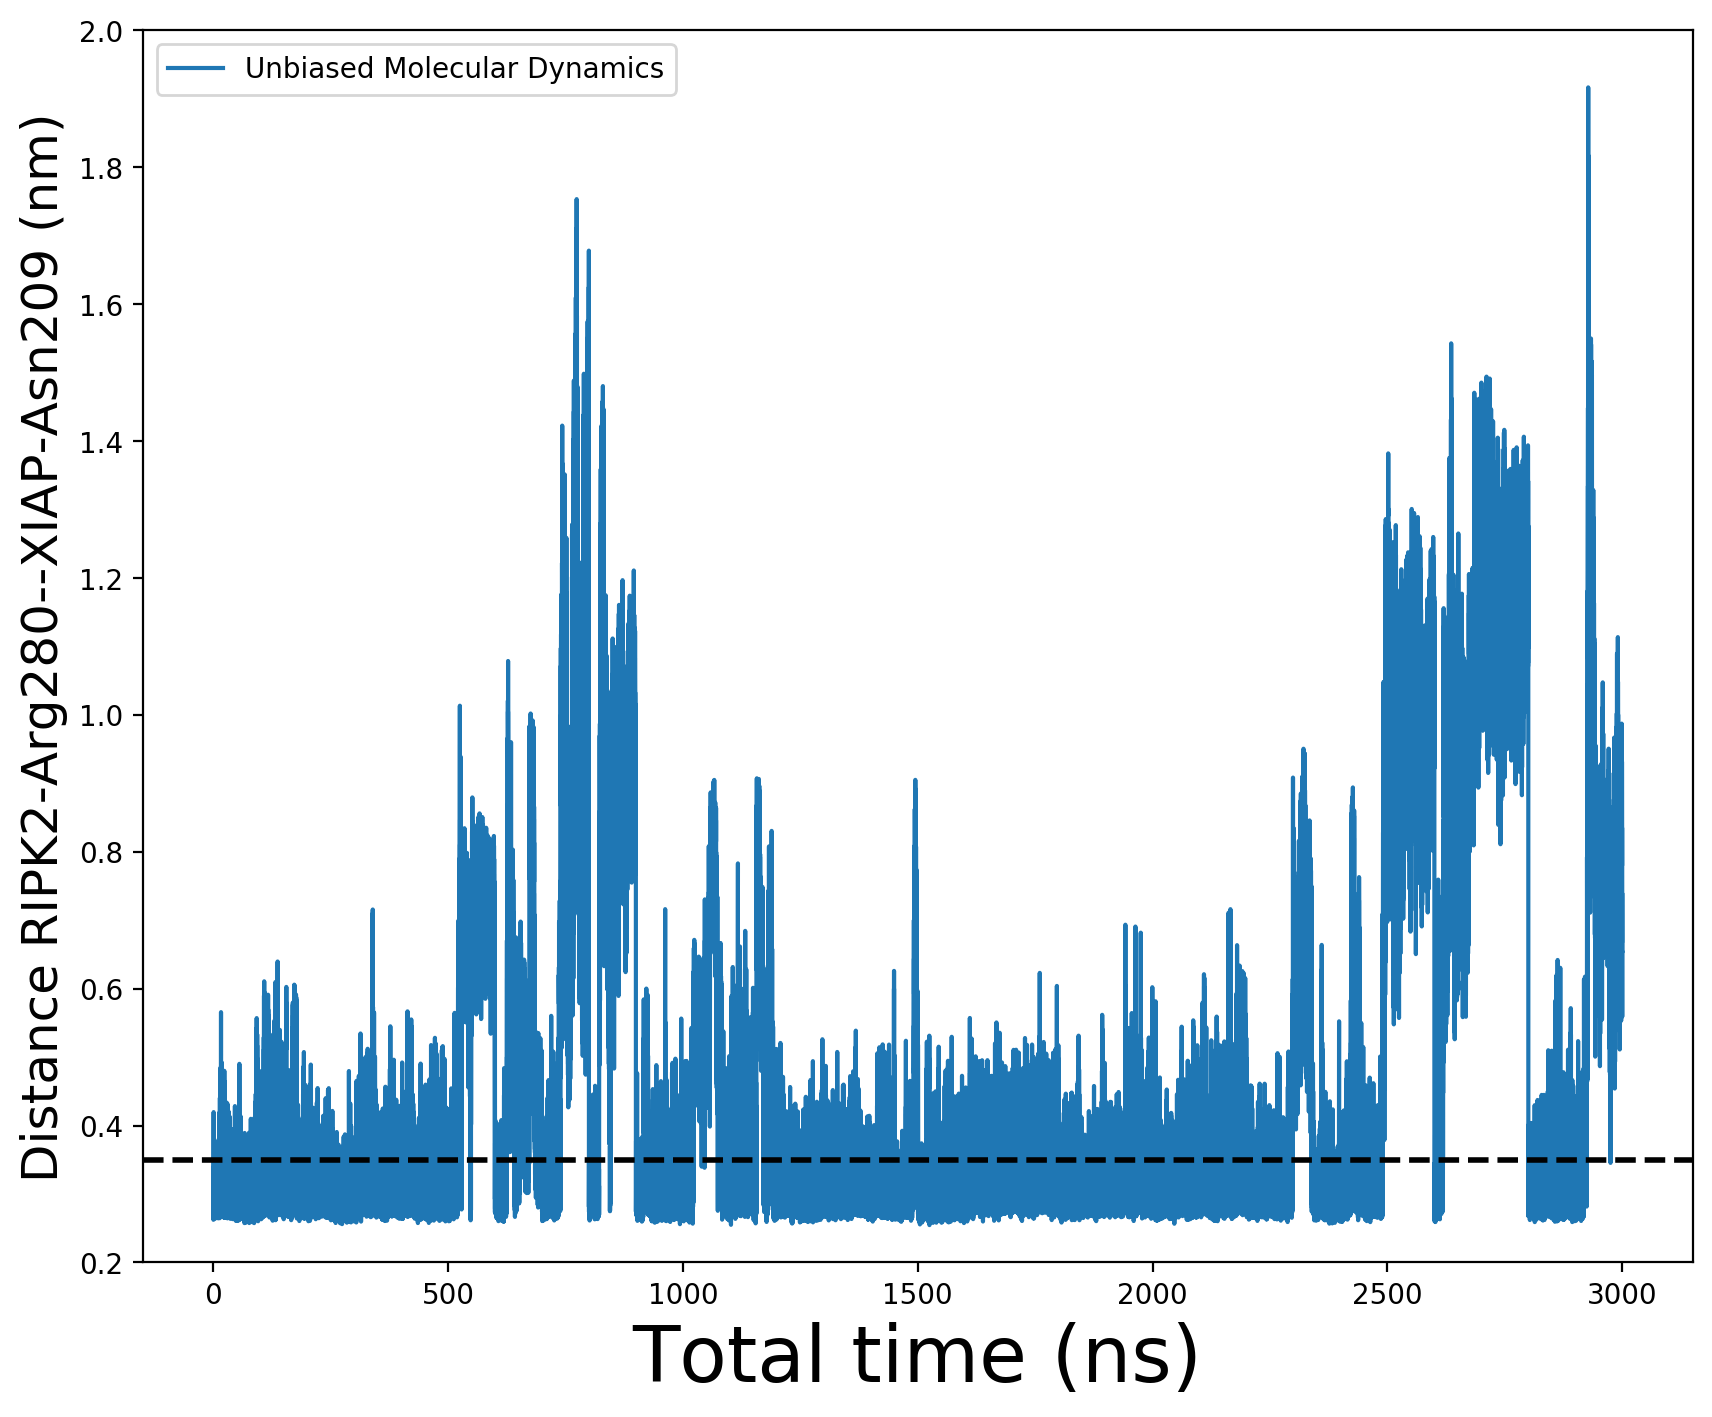

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,3], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Arg280--XIAP-Asn209 (nm)', fontsize=18)
ax.set_ylim(0.2, 2.0)
ax.axhline(y=0.35, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

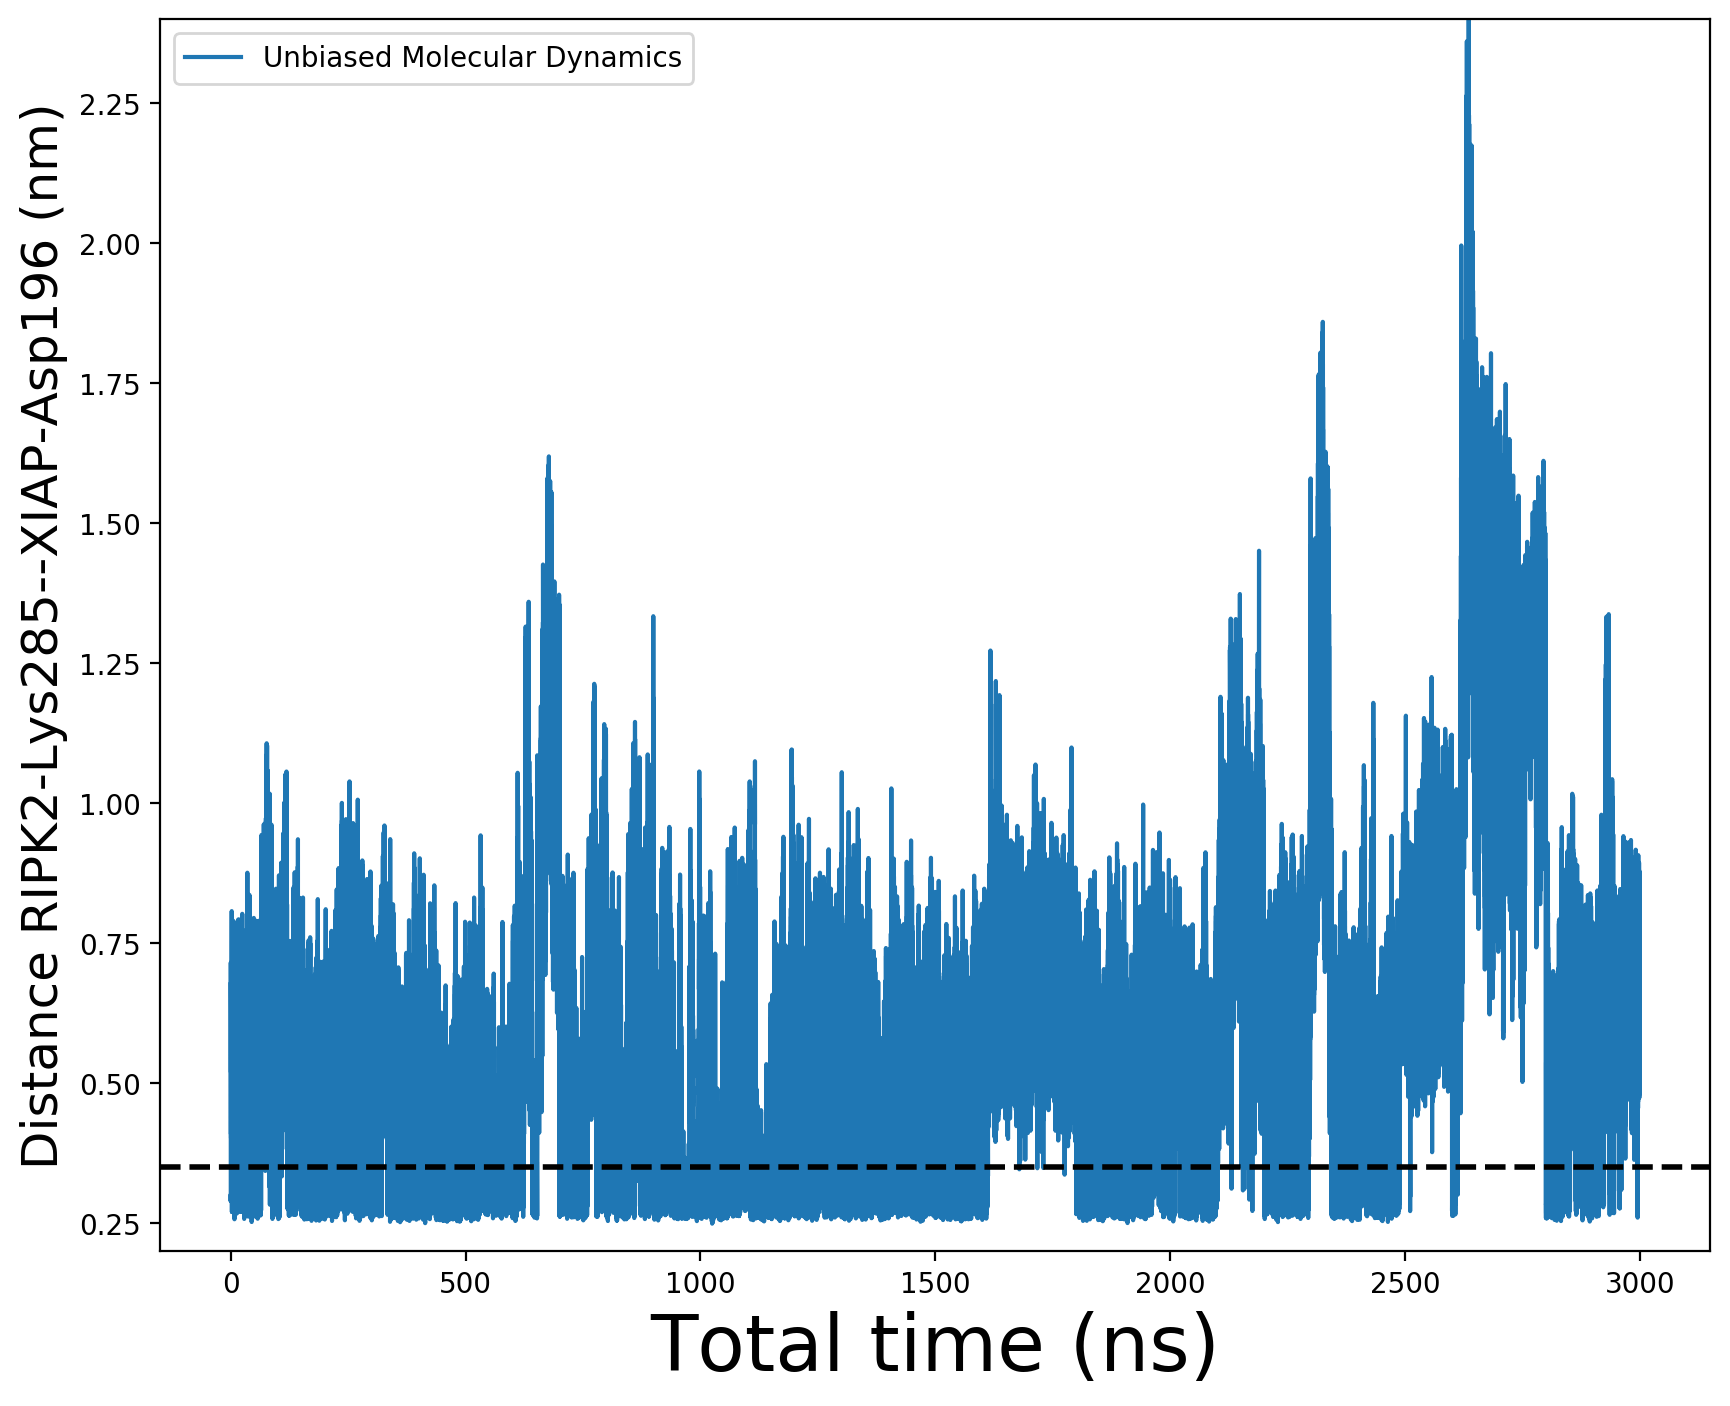

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,4], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Lys285--XIAP-Asp196 (nm)', fontsize=18)
ax.set_ylim(0.2, 2.4)
ax.axhline(y=0.35, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()

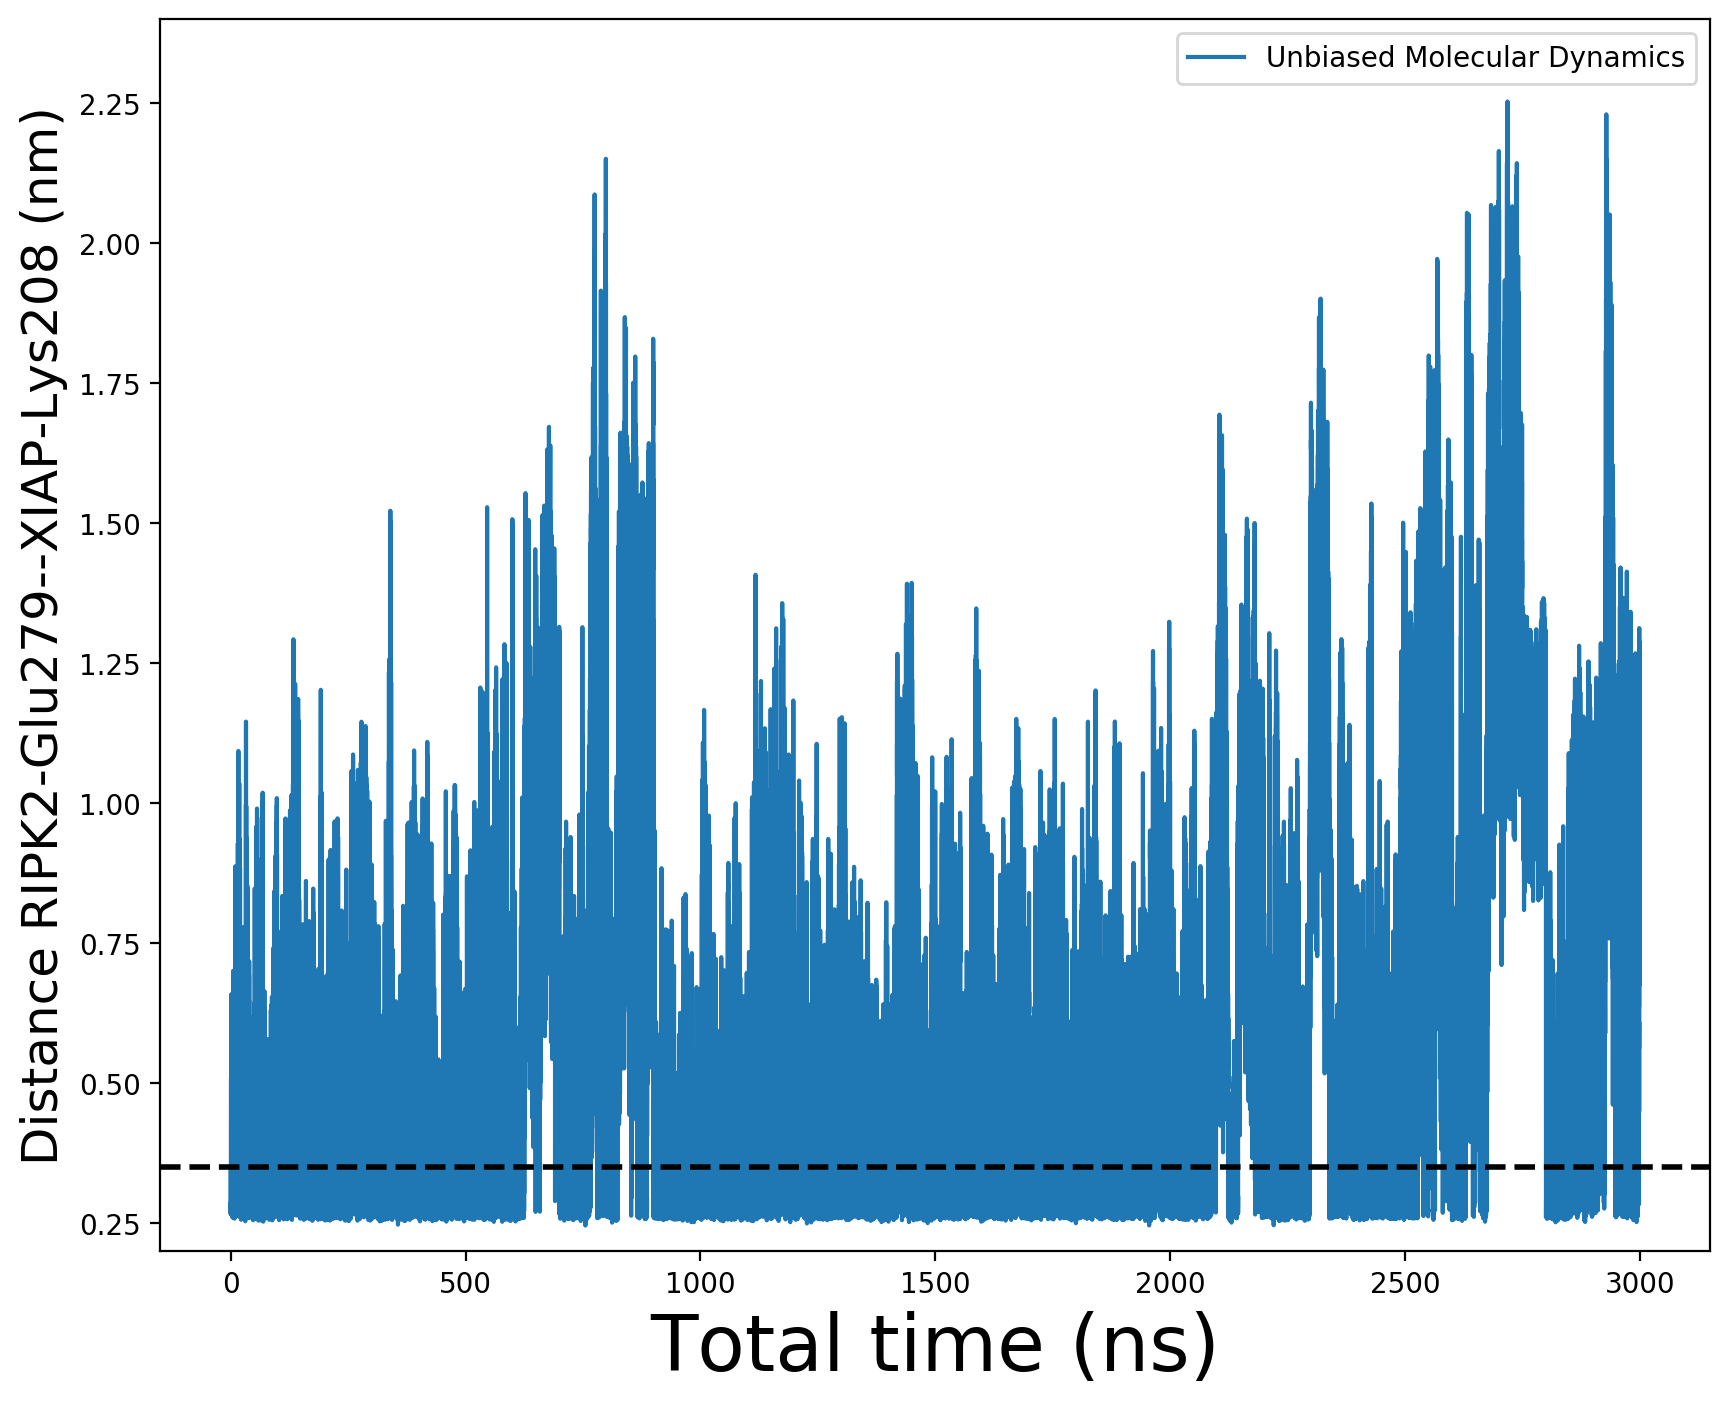

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(time / 100 , dxxx[:,5], '', label='Unbiased Molecular Dynamics')
plt.xlabel('Total time (ns)', fontsize=28)
ax.set_ylabel('Distance RIPK2-Glu279--XIAP-Lys208 (nm)', fontsize=18)
ax.set_ylim(0.2, 2.4)
ax.axhline(y=0.35, color='black', linestyle='--', linewidth=2)
plt.legend()

plt.show()